# A normal distribution sampler in python

Last year, I had the pleasure of attending a tutorial with the great [Petros Dellaportas](http://www.homepages.ucl.ac.uk/~ucakpde/#), a one-day primer in bayesian inference. One of the main sessions was about Markov chain Monte Carlo sampling, the technique whose name inspired one of the all-time greatest blog names (and blogs) ever: ['While my MCMC gently samples'](https://twiecki.io/)... and _also_ a game-changing statistical insight when it comes to sampling from complex statistical distributions. Following the session, I caught up with Petros and asked a pretty useful question, but pretty revealing question: 

<p><center>'So, I kind of understand MCMC now... but why does it matter?!'</center></p>

Petros being Petros was more than equal to my question:

<p><center>'MCMC is a tool to sample from complex distributions. Let's start with a simple distribution, the Normal Distribution. After this session, go and write a normal distribution sampler. Then, go and look up the Box-Mueller method, and you'll realise that MCMC matters.</center></p>

So, here's my naive attempt. Further down, we'll see how limiting it is, and how we can do better. 

In [2]:
import numpy as np
from numpy.random import rand

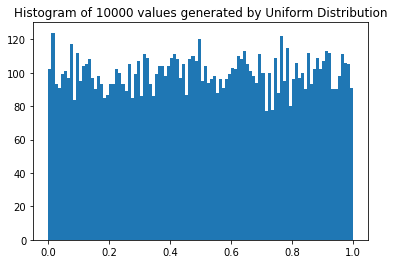

In [3]:
## testing out the random.rand function to set some tests for our proposed solution

import matplotlib.pyplot as plt
%matplotlib inline 
n = 10000

test_set = rand(n)

plt.hist(test_set, bins=100)  
plt.title("Histogram of %i values generated by Uniform Distribution" %(n))
plt.show()

My plan: create the normal curve, then implement the trapezium rule...


The normal distribution is defined as:



In [5]:
def norm(x_array, m, s):
    point_array = 1/np.sqrt(2*3.14*s**2)*np.exp((-(x_array - mu)**2)/2*s**2)
    return(point_array)

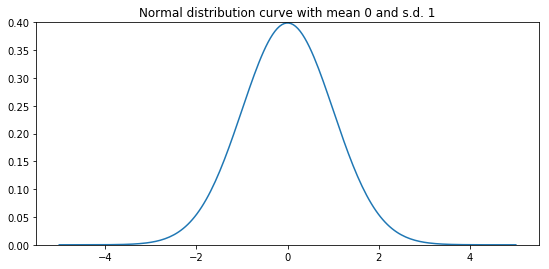

In [6]:
sigma = 1
mu = 0

x = np.linspace(-5,5,200)
y = norm(x, mu, sigma)


fig = plt.figure(figsize=(9,9))

n_axes = fig.add_subplot(211)

n_axes.set_autoscaley_on(False)
n_axes.set_ylim([0,0.4])

n_axes.plot(x, y)
plt.title("Normal distribution curve with mean %i and s.d. %i" %(mu, sigma))
plt.show()

We have an interval e.g. (0,0.25)
We can calculate the y values at the beginning and end of the interval, then we use the trapezium rule (1/2 * sum of ends * width) to get the area



In [8]:

sigma = 1
mu = 0


x_int = np.array([0,0.25])
x_width = x_int.max() - x_int.min()
y_vals = norm(x_int, mu, sigma)
area = 0.5 * y_vals.sum()*x_width

print(y_vals)
print(area)

[0.39904344 0.38676617]
0.09822620105583275


In [9]:
## function to calculate the trapezium area

def trap_area(y1, y2, width):
    return 0.5*(y1 + y2)* width

trap_area(*y_vals, x_width)

0.09822620105583275

In [10]:
sigma = 1
mu = 0

## set our full interval to be 4 s.d. from the mean
## so with ~(0,1) we'll get an interval of (-4, 4)
interval = np.array([mu - sigma*4,mu+sigma*4])
## split this into k strips, which will control how fine-grain our slices are (let's say k = 80, intervals of 0.1)
k = 80
strip_width = (interval[1]-interval[0])/k

sub_strips = np.linspace(*interval, k + 1) ## 81 edges gives 80 strips
sub_strips_pairs = [np.array([sub_strips[p],sub_strips[p+1]]) for p in range(80)]


## also set how many samples we want 
n = 10000

## the area of the strip tells us how many values we want to select, as a proportion of n
## create an array of areas

areas = np.array([trap_area(*norm(s, mu, sigma),0.1) for s in sub_strips_pairs])

print(areas.sum()) ## we can live with a slightly 'overconfident' total probability...

## then we can generate these using a uniformly distributed rv within that interval
bin_counts = np.round(areas*n)



1.00018932606553


In [11]:
## sense check

x = bin_counts[30]
interval = sub_strips_pairs[30]
width = interval[1] - interval[0]

print("%i values in the interval (%f,%f)" %(x, *interval))
p = rand(int(x))*width + interval[0]

254 values in the interval (-1.000000,-0.900000)


In [12]:
normal_sample = np.array([])

for i in range(k):
    count = bin_counts[i]
    strip = sub_strips_pairs[i]
    sample = rand(int(count))*width + strip[0]
    normal_sample = np.append(normal_sample, sample)
    
len(normal_sample) ## ok, so we gained a couple of samples, but nothing to worry about

10004

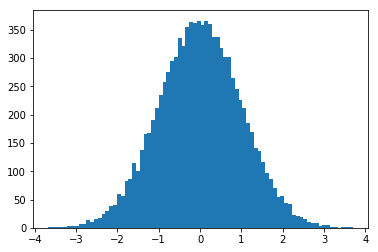

In [13]:
plt.hist(normal_sample, bins = 80)
plt.show()

In [17]:
## Now that we have a normally distributed sample, we can just make a uniformly random selection from this array

def normal_distribution_generator():
    x = normal_sample[np.random.randint(len(normal_sample))]
    return x

normal_distribution_generator()

0.35473060475158835

Let's wrap this code up, and put it through its paces.

In [18]:
#TODO

# Wrap Normal dist code into a class, with parameter k (number of bins) 

# test implementation with increasing accuracy, show that its slow 

# Start the box_mueller implementation